# A program to create a time series from a movie's  incomes according to different premier days around the world

## Part one

In this part a file is loaded to the program to transform the money and dates formats to a integers and dates that python be able to manipulate. 

The file have to be in csv, previously have be cleaned and with text in a specific format, as it is shown below.

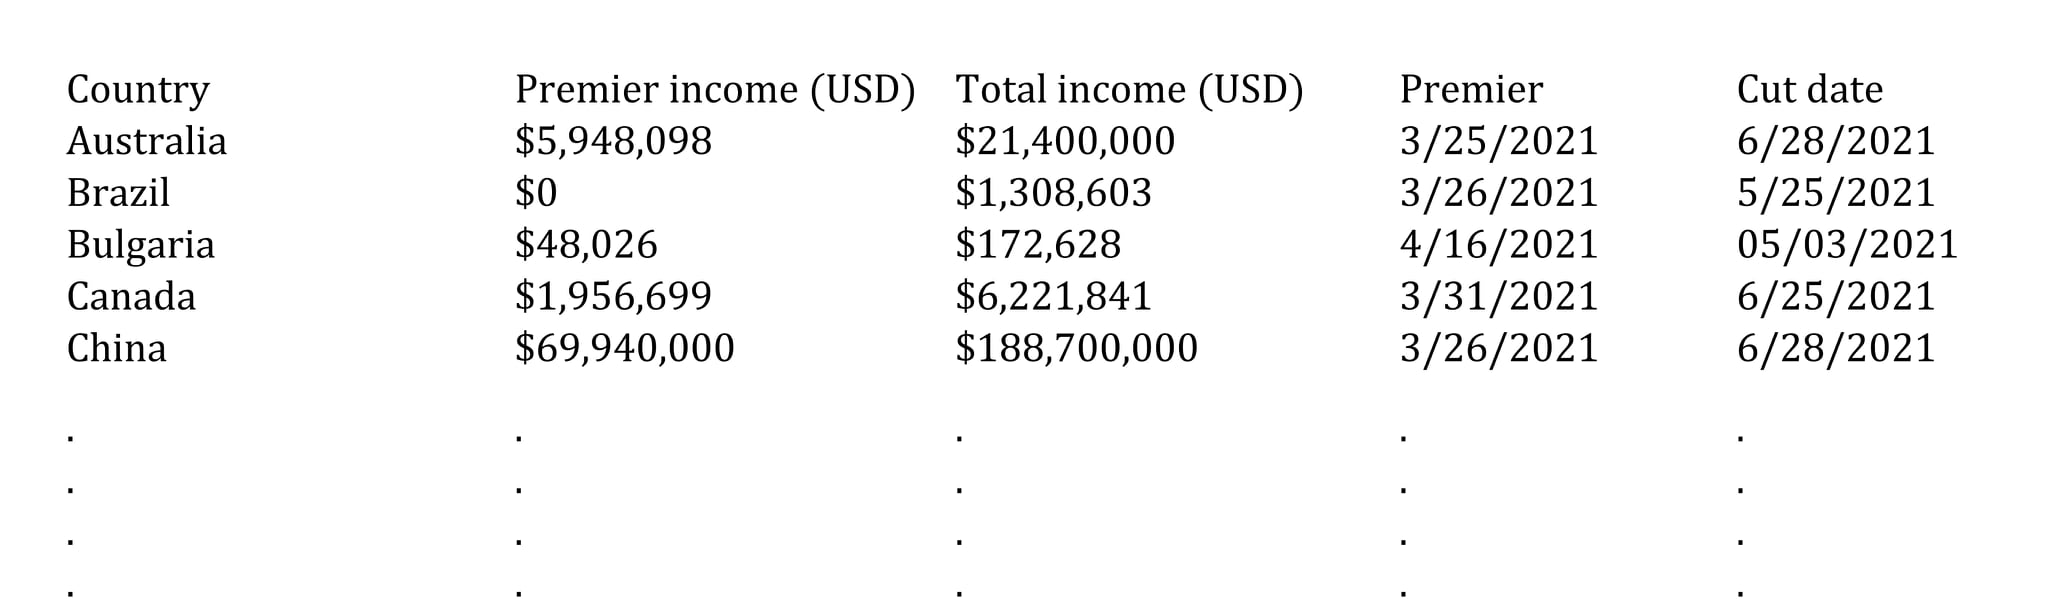

In [ ]:
#As there will be file and dates manipulation it is necessary to import some specific libraries.
from datetime import datetime, timedelta
import pandas as pd
import calendar as cl

In [ ]:
#Here is read the clean data frames with data of movie's Box Office
income = pd.read_csv('GodzillaVSKong.csv') 

days = list()
income_late = list()
days_premier = list()
income_prem = list()
date_premier = list()
date_monday = list()

i = 0
for date in income['Premier']:
    i = i + 1
    
    #Conversion of days movie had on its first weekend, to the format of dates that datetime library can read
    date_old = income.loc[i-1,'Premier'].split('/')
    year = int(date_old[2])
    month = int(date_old[0])
    day = int(date_old[1])
    date_1 = datetime(year,month,day)
    
    date_premier.append(date_1)  
    date_first = date_1  #This variable will be useful later
    
    #Here is difined the amount of days movie had in its weekend premier    
    if income.loc[i-1,'Country'] == 'World':
        date_1 = date_1
        days_premier.append(1)
    elif cl.day_name[date_1.weekday()] == 'Wednesday':
        date_1 = date_1 + timedelta(days = 5)
        days_premier.append(5)
    elif cl.day_name[date_1.weekday()] == 'Thursday':
        date_1 = date_1 + timedelta(days = 4)
        days_premier.append(4)
    elif cl.day_name[date_1.weekday()] == 'Friday':
        date_1 = date_1 + timedelta(days = 3)
        days_premier.append(3)
    elif cl.day_name[date_1.weekday()] == 'Saturday':
        date_1 = date_1 + timedelta(days = 2)
        days_premier.append(2)
    elif cl.day_name[date_1.weekday()] == 'Sunday':
        date_1 = date_1 + timedelta(days = 1)
        days_premier.append(1)
    else:
        continue
    
    date_old = income.loc[i-1,'Cut date'].split('/')
    year = int(date_old[2])
    month = int(date_old[0])
    day = int(date_old[1])
    date_2 = datetime(year,month,day)
    date_monday.append(date_1)
    dayint = (date_2 - date_1).days

    days.append(dayint)
    
    #Conversion of days movie had from its first monday 
    money = income.loc[i-1,'Premier income (USD)']
    if income.loc[i-1,'Country'] == 'World':
        money = '$0.00'
    aux1 = money.replace('.00','')
    aux2 = aux1.replace('$','')
    number = aux2.replace(',','')
    inc_premier = int(number)
    income_prem.append(inc_premier)
    money = income.loc[i-1,'Total income (USD)']
    aux1 = money.replace('.00','')
    aux2 = aux1.replace('$','')
    number = aux2.replace(',','')
    inc_total = int(number)
    difference = inc_total - inc_premier
    
    income_late.append(difference)

rate_income = list()
rate_premier = list()

for i in range(len(days)):
    try:
        rate_income.append(int(income_late[i]/days[i]))
    except:
        rate_income.append(int(income_late[i]))
    rate_premier.append(int(income_prem[i]/days_premier[i]))

#The dataframe income is to can see all data, not with later purpose
income['Días Estreno'] = days_premier
income['Tasa Ingreso Estreno(USD)'] = rate_premier
income['Días Diferencia'] = days
income['Dinero Diferencia'] = income_late
income['Tasa Ingreso (USD)'] = rate_income

df_income = pd.DataFrame({'country':income['Country'],'date_premier':date_premier, 'days_premier':days_premier,
                           'rate_premier':rate_premier, 'date_monday':date_monday,'days_late':days, 
                           'rate_late':rate_income})

## Part Two

This part is to generate a new dataframe only with the two columns will be used to do the chart: dates and world income per day.

The way this part works is:
* **First**, it creates a dataframe where each columns be a country, and each row be a date, from the first date registered as a premier in any country, to the last day registered in cinemas in the respective country. If there is no data, will be zero.
* **Second**, each row will be sum to get how mucho income had that date.
* **Third**, only the first (dates) and last (income per day) columns will be saved in a new dataframe, to do the chart.

In [ ]:
#Here is generated the time series to do later the chart
dates = []
day = date_first
date_end = date_first + timedelta(days = int(df_income['days_late'][len(df_income)-1]))

for d in range(1000):    #d refers to day & range is enough large to cover all possible dates that movie is in cinemas
    dates.append(day)
    day = day + timedelta(days = 1)
    if d == df_income['days_late'][len(df_income)-1]:
        break

df_serie = pd.DataFrame()

for ind in range(len(df_income)): #ind refers to index
    country = []                  #This list is created each for loop
    for date in dates:
        
        if (date != df_income['date_premier'][ind] and    #Transformation from dates format to integer format
        len(country) < int(str(df_income['date_premier'][ind]-date_first).split(' ')[0])): 
            for i in range(100):
                if timedelta(days=i) == df_income['date_premier'][ind]-date_first:
                    break
                else:
                    country.append(0)
                    break

        if date == df_income.loc[ind,'date_premier']:
            for dpr in range(10):                      #dpr refers to days premier
                if dpr >= df_income.loc[ind,'days_premier']:
                    break
                country.append(df_income.loc[ind,'rate_premier'])

        if date == df_income['date_monday'][ind]:
            for dla in range(100):                     #dla refers to days later (of premier weekend)
                if dla == df_income['days_late'][ind]:
                    break
                country.append(df_income['rate_late'][ind])
    
        integ_aux = int(int(str(df_income['date_premier'][ind]-date_first).split(' ')[0]) + 
                     df_income['days_premier'][ind] + df_income['days_late'][ind])
        i = 0
        if date != df_income['date_premier'][ind] and len(country) >= integ_aux:
            i = i + 1
            if df_income['country'][ind] == 'World':
                country[len(country)-1] =  0
                break
            if df_income['days_late'][len(df_income)-1] == len(country):
                country.append(0)
                break
            country.append(0)

    try:
        df_serie[df_income['country'][ind]] = country
    except:
        df_serie[df_income['country'][ind]] = country[1:len(df_serie)]

income = df_serie.sum(axis=1)
time_series = pd.DataFrame({'date':dates,'income':income})

## Part Three

Finally, the chart is made.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as tick

In [ ]:
#This function is to convert scientific notation of the Y axe to a money format
def y_fmt(x, y):
    return '${:,.0f}'.format(x)

plt.style.use('seaborn-dark')
title = 'Godzilla vs King Kong'
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111)

parameters = {'ytick.labelsize': 12, 'xtick.labelsize': 12}
plt.rcParams.update(parameters)

plt.xticks(rotation=45, horizontalalignment='right')

plt.title(title + "\n", fontsize=18, color = 'k')
ax.plot(time_series['date'], time_series['income'])


ax.annotate('Premier in China', fontsize= 14, xy=('2021-03-29', 34e6), xytext=('2021-04-02', 35e6), 
             arrowprops=dict(facecolor='r', shrink=0.01))
ax.annotate('Premier in North America', fontsize= 13, xy=('2021-04-04', 10e6), xytext=('2021-04-08', 11e6), 
             arrowprops=dict(facecolor='r', shrink=0.01))

plt.grid(b=True)
plt.text('2021-05-15', 23e6, 'Country: USA \nGenre: Action & Adventure \nRotten Tomatoes: 75% \niMDb Score: 6.4', 
         fontsize = 15, color = 'navy')
plt.text('2021-05-15', 20e6, 'Incomes to June 30th: $250 millions \nStill in billboard', 
         fontsize = 15, color = 'navy')
plt.xlabel('Days', fontsize=15)
plt.ylabel('Income (USD)', fontsize=15)
  
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.savefig('image_name.jpg', dpi = 150, bbox_inches = 'tight')

And Will be generate a chart like this one:

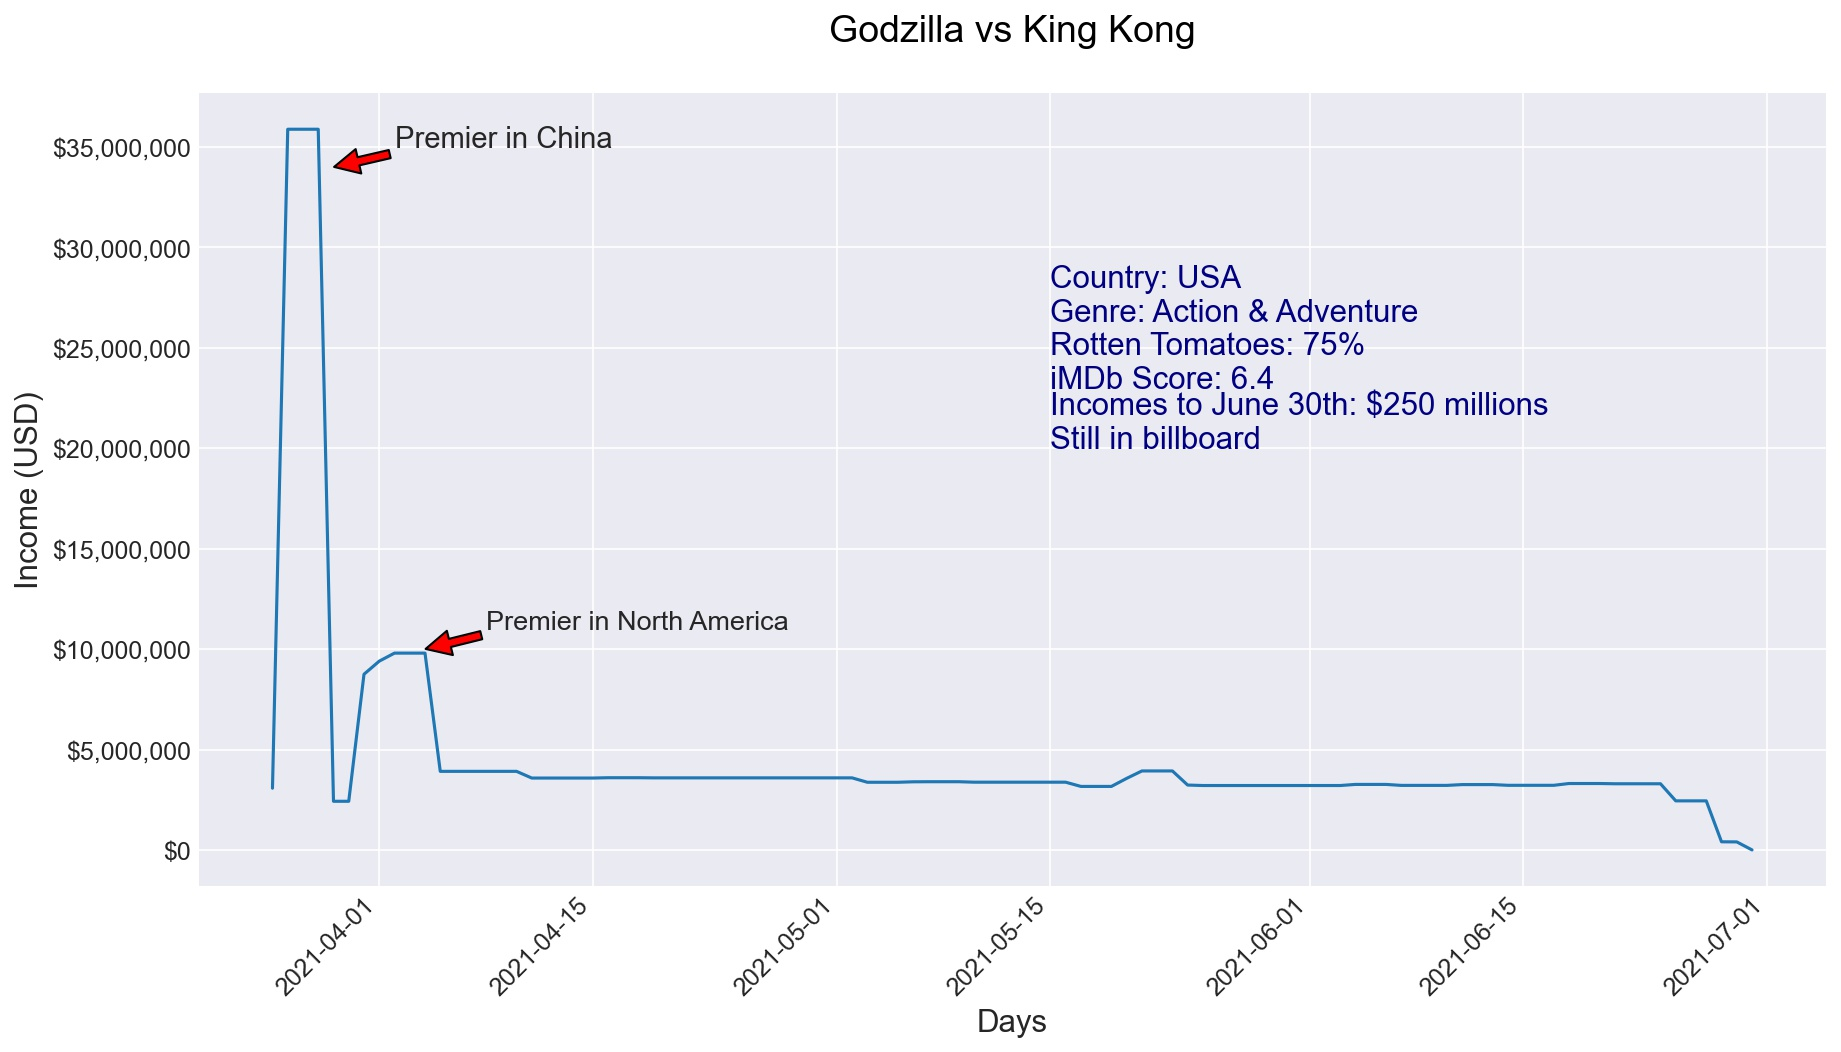